# Exploring the Chinook database with SQL

In this notebook, you will practice using SQL queries with Pandas to explore the [Chinook database](https://chinookdatabase.codeplex.com/) of music.

## Imports

In [1]:
import numpy as np
import pandas as pd
from pandas.io import sql
from altair import *

In [2]:
from sqlalchemy import create_engine, inspect

Here is a function for showing table information:

In [3]:
def table_info(table_name, i):
    """Shwo the column names and types as a Pandas DataFrame."""
    return pd.DataFrame(i.get_columns(table_name))[['name','type']]

In [4]:
import os
assert os.path.isfile(os.path.join('data', 'Chinook_Sqlite.sqlite'))

## Exploring the database

Create an SqlAlchemy engine for the Chinook database, which is in the file `data/Chinook_Sqlite.sqlite` as save the engine in a variable named `ce`:

In [5]:
ce = create_engine('sqlite:///data/Chinook_Sqlite.sqlite')

In [6]:
import sqlalchemy
assert isinstance(ce, sqlalchemy.engine.base.Engine)

Create an inspector for that engine and save it in a variable named `inspector`:

In [7]:
inspector = inspect(ce)

In [8]:
assert isinstance(inspector, sqlalchemy.engine.reflection.Inspector)

Use the `inspector` and `table_info` to show the column information of the `Genre` table. Save the result in a variable named `t1` and show the table:

In [9]:
t1 = table_info('Genre', inspector)

In [10]:
t1

,name,type
0,GenreId,INTEGER
1,Name,NVARCHAR(120)


In [11]:
assert list(t1.columns)==['name','type']
assert len(t1)==2

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Genre` table. Save the result in a variable named `t2` and show the table:

In [12]:
t2 = sql.read_sql_query("""
SELECT * FROM Genre LIMIT 10;
""", ce)

In [13]:
t2

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [14]:
assert list(t2.columns)==['GenreId', 'Name']
assert len(t2)==10

Use the `inspector` and `table_info` to show the column information of the `Track` table. Save the result in a variable named `t3` and show the table:

In [15]:
t3 = table_info('Track', inspector)

In [16]:
t3

,name,type
0,TrackId,INTEGER
1,Name,NVARCHAR(200)
2,AlbumId,INTEGER
3,MediaTypeId,INTEGER
4,GenreId,INTEGER
5,Composer,NVARCHAR(220)
6,Milliseconds,INTEGER
7,Bytes,INTEGER
8,UnitPrice,"NUMERIC(10, 2)"


In [17]:
assert list(t3.columns)==['name', 'type']
assert len(t3)==9

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `Track` table. Save the result in a variable named `t4` and show the table:

In [18]:
t4 = sql.read_sql_query("""
SELECT * FROM Track LIMIT 10;
""", ce)

In [19]:
t4

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [20]:
assert list(t4.columns)==['TrackId','Name','AlbumId','MediaTypeId',
                          'GenreId','Composer','Milliseconds',
                          'Bytes','UnitPrice']
assert len(t4)==10

Use the `inspector` and `table_info` to show the column information of the `MediaType` table. Save the result in a variable named `t5` and show the table:

In [21]:
t5 = table_info('MediaType', inspector)

In [22]:
t5

,name,type
0,MediaTypeId,INTEGER
1,Name,NVARCHAR(120)


In [23]:
assert list(t5.columns)==['name', 'type']
assert len(t5)==2

Use a SQL `SELECT` statement with `LIMIT` to look at the first 10 rows of the `MediaType` table. Save the result in a variable named `t6` and show the table:

In [24]:
t6 = sql.read_sql_query("""
SELECT * FROM MediaType LIMIT 10;
""", ce)

In [25]:
t6

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [26]:
assert list(t6.columns)==['MediaTypeId', 'Name']
assert len(t6)==5

Write an SQL query to select the `Name`, `Composer` and `UnitPrice` columns from the `Track` table for the rows where the `UnitPrice` is greater than `0.99`. Save the result in a variable named `t7` and show the table:

In [27]:
t7 = sql.read_sql_query("""
SELECT Name, Composer, UnitPrice FROM Track WHERE UnitPrice > 0.99;
""", ce)

In [28]:
t7

,Name,Composer,UnitPrice
0,Battlestar Galactica: The Story So Far,None,1.99
1,Occupation / Precipice,None,1.99
2,"Exodus, Pt. 1",None,1.99
3,"Exodus, Pt. 2",None,1.99
4,Collaborators,None,1.99
5,Torn,None,1.99
6,A Measure of Salvation,None,1.99
7,Hero,None,1.99
8,Unfinished Business,None,1.99
9,The Passage,None,1.99


In [29]:
assert list(t7.columns)==['Name', 'Composer', 'UnitPrice']
assert len(t7)==213

Join the `Track` and `Genre` tables on the `GenreId` columns and compute the average track length in seconds grouped by `Genre.Name`. Sort the results by the track length (`Track.Milliseconds`). Save the result in a variable named `j1` and show the table:

In [30]:
j1 = sql.read_sql_query("""
SELECT Genre.Name, avg(Track.Milliseconds / 1000) as Duration FROM Track
    JOIN Genre ON Genre.GenreId = Track.GenreId
    GROUP BY Genre.Name
    ORDER BY Duration;
""", ce)

In [31]:
j1

,Name,Duration
0,Rock And Roll,134.166667
1,Opera,174.000000
2,Hip Hop/Rap,177.714286
3,Easy Listening,188.625000
4,Bossa Nova,219.000000
5,R&B/Soul,219.557377
6,World,224.392857
7,Pop,228.541667
8,Latin,232.378238
9,Alternative & Punk,233.861446


In [32]:
assert list(j1.columns)==['Name', 'Duration']
assert len(j1)==25

Create an Altair bar chart showing the average track duration for each genre, sorted by duraction.

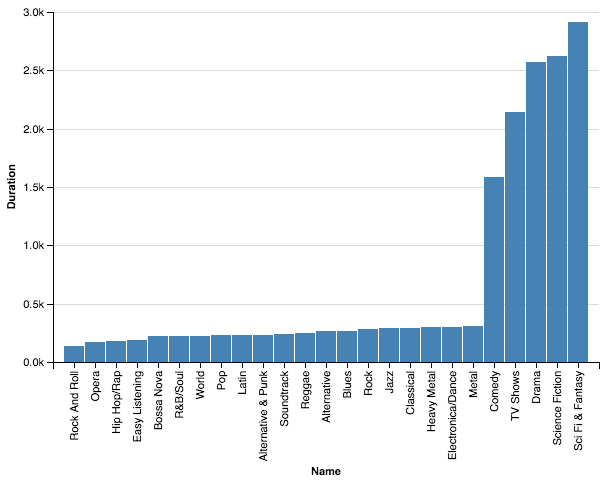

In [33]:
Chart(j1).mark_bar().encode(
    X('Name', sort=SortField(field='Duration', order='descending')),
    Y('Duration:Q')
)

Join the `MediaType` and `Track` tables and count how many tracks are released with a given media format. Order by the count of the media type. Save the result in a variable named `j2` and show the table:

In [34]:
j2 = sql.read_sql_query("""
SELECT MediaType.Name, count(*) as Count FROM MediaType
    JOIN Track ON Track.MediaTypeId = MediaType.MediaTypeId
    GROUP BY MediaType.Name
    ORDER BY Count;
""", ce)

In [35]:
j2

,Name,Count
0,Purchased AAC audio file,7
1,AAC audio file,11
2,Protected MPEG-4 video file,214
3,Protected AAC audio file,237
4,MPEG audio file,3034


In [36]:
assert list(j2.columns)==['Name', 'Count']
assert len(j2)==5

Make a bar plot of the media type counts:

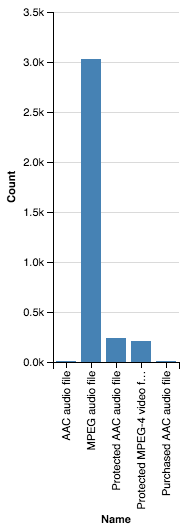

In [37]:
Chart(j2).mark_bar().encode(
    X('Name'),
    Y('Count')
)